# Problem Statement : Classification of Retailers

**Background:** Case study is sales data for Feb’17 of one area. 

**Details :** 
* Retailer Name : There are total 9938 unique retailers in this area
* Brands : Total 12 different brands can be sold to retailer 
* Total Sales : This is sum total of sales of all brands 
* Number of Brands : Total number of unique brands purchased by retailers
* Values are in Rupees for Brands Sales and Total Sales

**Tip:** Retailers can be classified as Category A, B & C. Category A retailers are one who place regular orders and Category C are one who place irregular orders.

**Question:**
How will you classify retailers using sales data of Feb’17. : Please name analytics techniques which can used for classification?<br>
**Answer:**
* As training dataset is not provided, we can not use Supervised learning (Classification algorithms). So only Unsupervised learning (Clustering algorithms) can be used for segmentation.<br>
*     *K-Means Clustering* algorithm will be suitable for classification/segmentation of Retailers as we already know that classification has to be done into 3 Categories(A, B & C).<br><br>

**Question:**
What all variables/data will you use for classification of retailers?<br>
**Answer:**
* Columns/variables 'Brand1', 'Brand2', 'Brand3', 'Brand4', 'Brand5', 'Brand6', 'Brand7', 'Brand8', 'Brand9', 'Brand10', 'Brand11' & 'Brand12' will you use for classification of retailers.
* 'Total Sales' & 'Number of Brands' are derived columns/variables, means we can find these columns from ['Brand1',.......,'Brand12']. Therefore these columns will not be use for classification.

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Importing provided data into pandas dataframe.

df = pd.read_excel("Case Study Data 1.xlsx")

In [3]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Retailer Name         9938 non-null   object 
 1   Brand1                9938 non-null   float64
 2   Brand2                9938 non-null   float64
 3   Brand3                9938 non-null   float64
 4   Brand4                9938 non-null   float64
 5   Brand5                9938 non-null   float64
 6   Brand6                9938 non-null   float64
 7   Brand7                9938 non-null   float64
 8   Brand8                9938 non-null   float64
 9   Brand9                9938 non-null   float64
 10  Brand10               9938 non-null   float64
 11  Brand11               9938 non-null   float64
 12  Brand12               9938 non-null   float64
 13  Total Sales           9938 non-null   float64
 14  Number of Brands      9938 non-null   int64  
 15  Category of Retailer 

In [5]:
df['Total Sales'].describe()

count    9.938000e+03
mean     1.551269e+04
std      8.245152e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.830092e+04
max      7.618235e+06
Name: Total Sales, dtype: float64

# K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
clustering_data = df.iloc[:, 1:-3]
clustering_data.head()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12
0,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0
1,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0
2,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0
3,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0
4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler

clustering_data = StandardScaler().fit_transform(clustering_data)
clustering_data[0:2]

array([[-0.22647301, -0.07110222, -0.01003165, -0.17289003, -0.09409677,
        -0.16320717, -0.03848998, -0.18500219, -0.16858582,  4.80172818,
        -0.19920617, -0.08717942],
       [ 1.14230678, -0.07110222, -0.01003165,  1.38672971,  1.00567726,
        -0.16320717, -0.03848998, -0.18500219, -0.16858582, -0.26526088,
        -0.19920617, -0.08717942]])

In [9]:
kclusters = 3
kmeanModel = KMeans(init="k-means++", n_clusters=kclusters, random_state=0)
kmeanModel.fit(clustering_data)
cluster_labels = kmeanModel.labels_      
cluster_labels                   # check cluster labels generated for each Retailer

array([2, 0, 0, ..., 0, 0, 0])

In [10]:
df['Category of Retailer'] = cluster_labels
df['Category of Retailer'].replace({0 : 'C', 1 : 'A', 2 : 'B'}, inplace = True)
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,B
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,C
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,C
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,C
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,C


#### Saving the Prediction as a excel file.

In [11]:
df.to_excel('Prediction-Solution.xlsx',index = False)

In [12]:
# Unique Category of Retailer.

df['Category of Retailer'].unique()

array(['B', 'C', 'A'], dtype=object)

In [13]:
# Group 'df' by 'Category of Retailer'

df_group = df.groupby('Category of Retailer') 

## Cluster insights

In [14]:
Total_Sales_Count = df_group[['Retailer Name']].count()
Total_Sales_Count.columns = ['Number of  Retailers']
Total_Sales_Count

,Number of Retailers
Category of Retailer,
A,1
B,894
C,9043


In [15]:
Total_Sales_Sum = df_group[['Total Sales']].sum()
Total_Sales_Sum.columns = ['Total Sales (Sum)']
Total_Sales_Sum

,Total Sales (Sum)
Category of Retailer,
A,7.618235e+06
B,7.144045e+07
C,7.510640e+07


In [16]:
df_group[['Total Sales']].mean()
Total_Sales_Mean = df_group[['Total Sales']].mean()
Total_Sales_Mean.columns = ['Total Sales (mean)']
Total_Sales_Mean

,Total Sales (mean)
Category of Retailer,
A,7.618235e+06
B,7.991101e+04
C,8.305474e+03


Text(0.5, 1.0, '% of  Retailers in each Category (Pie Plot)')

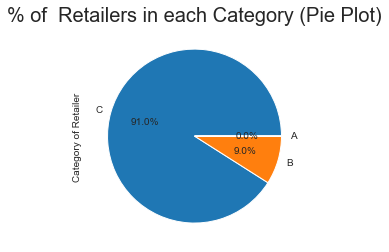

In [17]:
# Number of  Retailers - Pie Plot
df['Category of Retailer'].value_counts().plot.pie(autopct="%.1f%%")
plt.title('% of  Retailers in each Category (Pie Plot)', fontsize = 20)

Text(0.5, 1.0, 'Number of  Retailers in each Category (Count Plot)')

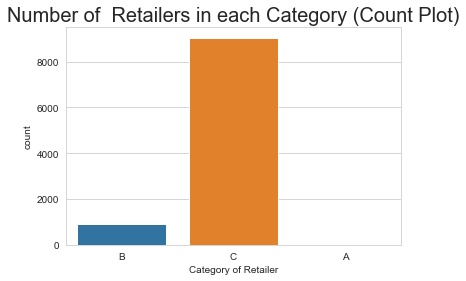

In [18]:
# Number of  Retailers - Count Plot
sns.countplot(x='Category of Retailer',data=df)
plt.title('Number of  Retailers in each Category (Count Plot)', fontsize = 20)

<AxesSubplot:xlabel='Category of Retailer', ylabel='Total Sales'>

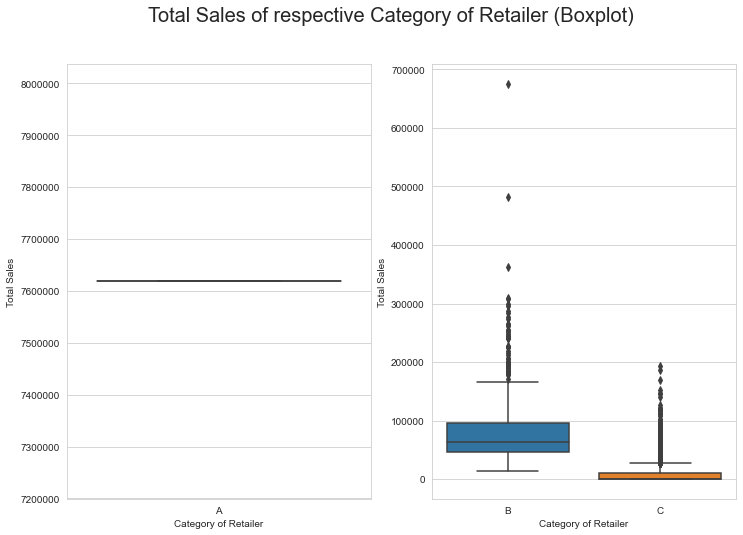

In [19]:
# Boxplot showing Total Sales of respective Category of Retailer.

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Total Sales of respective Category of Retailer (Boxplot)', fontsize = 20)

sns.boxplot(ax=axes[0], x='Category of Retailer', y='Total Sales' ,data=df[df['Category of Retailer'] == 'A'])
axes[0].get_yaxis().get_major_formatter().set_scientific(False)

sns.boxplot(ax=axes[1], x='Category of Retailer', y='Total Sales' ,data=df[df['Category of Retailer'] != 'A'])

##  Conclusion:

Based on Boxplot showing Total Sales of respective Category of Retailer, we conclude that 
* Category A has highest sales, therefore they will place regular orders. 
* Category C has lowest sales, therefore they will place irregular orders.

|Category of Retailer|  Frequency of Order  |Number of  Retailers|Average sales per Retailer (Rs.)|
|---|---|---|---|
|A|place regular orders|1|76,18,235.00|
|B|place medium orders|894|79,911.01|
|C|place irregular orders|9043|8,305.47|

